In [53]:
# TensorFlow and tf.keras # needs 2~3 tensorflow.contents. however get all the tensorflow for programming easily. 
import tensorflow as tf
 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [54]:
x_train.shape # it is matrix+1 - three dimension

(60000, 28, 28)

x에 대한 분석 - 이미지는 2차원이다 - 메트릭스의 28 * 28 이 60000개가 있다고 생각. - 3차원으로 만들어 놓은것 - 60000/28/28
이에 대한 값들을 보면 

In [55]:
x_train[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

x값이 아까는 0에서 1사이로 왔는데 결과를 보면 0부터 255사이로 보여짐 - 이를 normalized해야함 255로 나누어 준다 
y는 안나눠 주는 이뉴는?

In [56]:
y_train.shape

(60000,)

y는 각각의 이미지에 대한 정답값 - 일차원 

In [57]:
y_train[:]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [58]:
x_test.shape

(10000, 28, 28)

In [59]:
y_test.shape

(10000,)

그 중에서 일부만을 차용해서 해당부분에 대한 정답 값 불러오기 

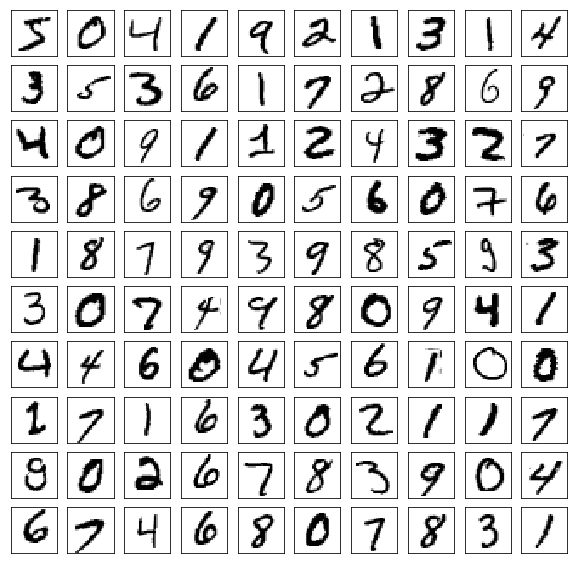

In [60]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1) #last one is index for input
    plt.xticks([])  # not showing x layer
    plt.yticks([])   # not showing y layer 
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

#### flatten과 dropout이라는 것이 들어가 잇음 

28 곱하기 28이 인풋으로 들어감 - 인풋은 1줄 - 그림은 2차원이니까 x*y 백터가 아닌 메트리스임. 어떻게 처리를 할까? - 말그대로 이를 flat해주면 된다
길게 쭉 풀어주면 된다. 이를 784개 직접 쓰기 귀찮으니까 flatten이라는 것을 쓰는거 - 이차원이 인풋으로 들어올때 - 이를 백터로 만들어 늘려주는 것
드롭아웃은 화살표들을 수치기 하는 것이다- 몇개를 띄엄띄엄 해놓으니까 더 잘된다는 것이 증명이 되어서

### 인풋의 노드의 사이즈는 무엇인가? 784개이다. / 첫번째 히든레이어의 노드의 숫자는 몇개 512개 / 제일 마지막의 노드의 개수는 10개 

In [61]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [63]:
'''
# ANN
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
'''
img_rows = 28
img_cols = 28
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # variety outputs 

In [64]:
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [65]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=1000)
model.evaluate(x_test, y_test)

Epoch 1/1000
19264/60000 [========>.....................] - ETA: 1:53 - loss: 0.3371 - acc: 0.8959

accuracy - 써있는게 점수이다 - 100점을 1로 기준해서 

In [27]:
from IPython.display import HTML

In [22]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [39]:
HTML(input_form + javascript)

<BarContainer object of 10 artists>

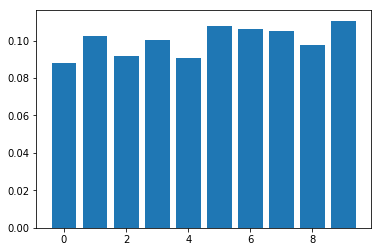

In [40]:
image_4darray = np.array(image).reshape([1,img_rows,img_cols,1])
result = model.predict(image_4darray) 
plt.bar(list(range(10)), list(result.reshape([10])))